# Matplotlib에서 제공하는 옵션 중에서 축과 격자를 설정하는 Axes.spines와 Axes.grid에 관한 내용입니다.

## 라이브러리

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np


## plot_example() 함수


In [2]:

def plot_example(ax, zorder=0):
    ax.bar(tips_day["day"], tips_day["tip"], color="lightgray", zorder=zorder)
    ax.set_title("tip (mean)", fontsize=16, pad=12)

    # Values
    h_pad = 0.1
    for i in range(4):
        fontweight = "normal"
        color = "k"
        if i == 3:
            fontweight = "bold"
            color = "darkred"

        ax.text(i, tips_day["tip"].loc[i] + h_pad, f"{tips_day['tip'].loc[i]:0.2f}",
                horizontalalignment='center', fontsize=12, fontweight=fontweight, color=color)

    # Sunday
    ax.patches[3].set_facecolor("darkred")
    ax.patches[3].set_edgecolor("black")

    # set_range
    ax.set_ylim(0, 4)
    return ax


## major_formatter() 함수

In [3]:
def major_formatter(x, pos):
    return"{%.2f}"%x
formatter=FuncFormatter(major_formatter)

## 시각화 데이터 불러오기

In [4]:
tips=sns.load_dataset('tips')
tips_day=tips.groupby('day').mean().reset_index()
print(tips_day)

    day  total_bill       tip      size
0  Thur   17.682742  2.771452  2.451613
1   Fri   17.151579  2.734737  2.105263
2   Sat   20.441379  2.993103  2.517241
3   Sun   21.410000  3.255132  2.842105


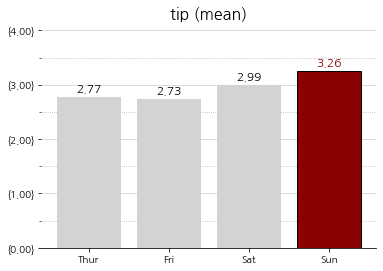

In [5]:
# spines
fig, ax=plt.subplots()
ax=plot_example(ax, zorder=2)

# 사각형 테두리 없애기
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ticker
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

# Grid
ax.grid(axis='y', which='major', color='lightgray')
ax.grid(axis='y', which='minor', ls=':')

## 업그레이드된 시각화 구현

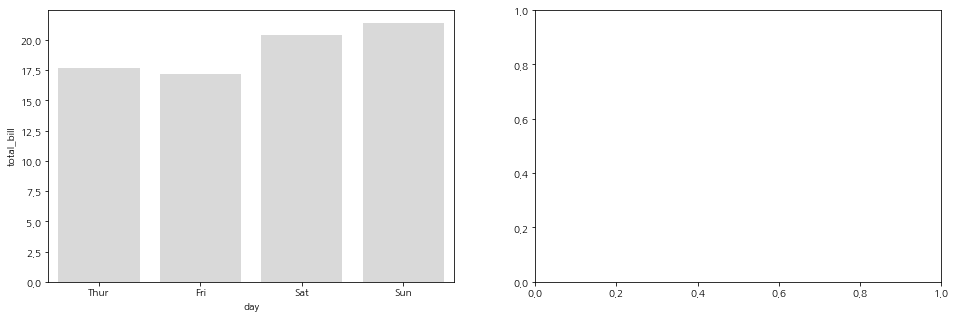

In [6]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Ideal Bar Graph
ax0=sns.barplot(x='day', y='total_bill', data=tips, ci=None,
                color='lightgray', alpha=0.85, zorder=2, ax=ax[0]) 

In [7]:
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
print('The Best day:', h_day)
print('The Highest Avg. Total Bill:', h_mean)

The Best day: Sun
The Highest Avg. Total Bill: 21.41


In [12]:
for p in ax0.patches:
    fontweight='normal'
    color='k'
    height=np.round(p.get_height(),2)
    if h_mean == height:
        fontweight='bold'
        color='darkred'
        p.set_facecolor(color)
        p.set_edgecolor('black')
    ax0.text(p.get_x()+p.get_width()/2., height+1, height, ha='center',
            size=12, fontweight=fontweight, color=color)
fig.show()


<ipython-input-12-0015e98fbd59>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
